The primary goal of this project is to analyze customer behavior and purchasing patterns from the Instacart dataset. By understanding when and what customers buy, as well as how they interact with the platform, the study aimed to generate actionable insights to improve operational efficiency, optimize marketing strategies, and enhance the overall shopping experience.

 Main Steps
Data Preprocessing
Objective: Clean the raw data to make it usable for analysis.
Actions Taken: Fixed data types, handled missing values, and removed duplicates.
Outcome: A clean dataset ready for exploration and deeper analysis.
Exploratory Data Analysis (EDA)
Objective: Identify patterns and trends in customer behavior.
Actions Taken:
Analyzed shopping patterns by time (hour of day, day of the week).
Studied the frequency of reorders and the types of products customers buy.
Investigated order sizes and distribution of products in carts.
Outcome: A comprehensive understanding of customer purchasing habits.
Insights and Recommendations
Objective: Translate findings into actionable business strategies.
Actions Taken: Identified peak shopping times, top products, and customer preferences for reorders.
Outcome: Proposed strategies for improving operations, customer satisfaction, and sales.

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
orders_df = pd.read_csv("/datasets/instacart_orders.csv",sep=';')

In [4]:
products_df = pd.read_csv('/datasets/products.csv',sep=';')

In [5]:
order_products_df = pd.read_csv('/datasets/order_products.csv',sep=';')

In [6]:
aisles_df = pd.read_csv('/datasets/aisles.csv',sep=';')

In [7]:
departments_df = pd.read_csv('/datasets/departments.csv',sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
#print(orders_df[(orders_df['order_dow']== 3) & (orders_df['order_hour_of_day']== 2)].duplicated())
filtered_data = orders_df[(orders_df['order_dow'] == 3) & (orders_df['order_hour_of_day'] == 2)].duplicated()
print('how many duplicate values for all orders placed Wednesday at 2:00 AM? ',filtered_data.sum(),'duplicate values')

how many duplicate values for all orders placed Wednesday at 2:00 AM?  15 duplicate values


In [9]:
# Check for duplicated orders
print(orders_df.duplicated().sum())
duplicated_order_df = orders_df[orders_df.duplicated()]
print(duplicated_order_df)
print(duplicated_order_df.sum())

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

In [10]:
# Remove duplicate orders
orders_df.drop_duplicates(inplace=True)

In [11]:
# Double check for duplicate rows
print(orders_df.duplicated().all().sum())

0


In [12]:
# Double check for duplicate order IDs only
duplicated_order_id = orders_df[orders_df['order_id'].duplicated()]
print(duplicated_order_id.sum())

#on the order_id column shows no duplicated values 

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


### `products` data frame

In [13]:
# Check for fully duplicate rows
print(products_df.duplicated().sum())
print()
duplicate_product_df= products_df[products_df.duplicated()]
print(duplicate_product_df.sum())


0

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


In [14]:
# Check for just duplicate product IDs
print(products_df['product_id'].duplicated().sum())

0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
print(products_df['product_name'].head())
products_df['product_name']= products_df['product_name'].str.lower()
duplicate_product_name= products_df['product_name'].duplicated(keep=False)

print(duplicate_product_name.sum())
products_df['product_name'].drop_duplicates(inplace=True)


0                           Chocolate Sandwich Cookies
1                                     All-Seasons Salt
2                 Robust Golden Unsweetened Oolong Tea
3    Smart Ones Classic Favorites Mini Rigatoni Wit...
4                            Green Chile Anytime Sauce
Name: product_name, dtype: object
1465


In [16]:
# Check for duplicate product names that aren't missing
duplicates_not_missing = products_df[~products_df['product_name'].isna() & duplicate_product_name]
#print(duplicates_not_missing.shape[0])
#print(duplicates_not_missing.count())
print(duplicates_not_missing['product_name'].count())

207


### `departments` data frame

In [17]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


### `aisles` data frame

In [19]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
order_products_df.info()
order_products_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


0

In [22]:
# Double check for any other tricky duplicates
op_df_duplicated = order_products_df.duplicated(keep=False)
print(op_df_duplicated.sum())

0


## Find and remove missing values


### `products` data frame

In [23]:
products_df.info()
#the 'product_name' Column has 48436 less then 49694 so it means there are 58 missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
# Are all of the missing product names associated with aisle ID 100?

missing_product_names = products_df[products_df['product_name'].isna()]
all_missing_in_aisle = (missing_product_names['aisle_id'] == 100).all()
print('Are all of the missing product names associated with aisle ID 100?',all_missing_in_aisle)

#YES all the missing value in the proudct names are associated with aisle ID 100

Are all of the missing product names associated with aisle ID 100? True


In [25]:
# Are all of the missing product names associated with department ID 21?
all_missing_in_dept_21 = (missing_product_names['department_id'] == 21).all()
print('Are all of the missing product names associated with department ID 21?',all_missing_in_dept_21)
#YES all the missing value in the proudct names are associated with aisle ID 100 and department ID 21 

Are all of the missing product names associated with department ID 21? True


In [26]:
# What is this ailse and department?
print(products_df[products_df['product_name'].isnull()].sample(100))
#all the missing value in the proudct names are associated with aisle 100 and department 21 

       product_id product_name  aisle_id  department_id
3421         3422          NaN       100             21
24408       24409          NaN       100             21
21504       21505          NaN       100             21
24737       24738          NaN       100             21
11083       11084          NaN       100             21
...           ...          ...       ...            ...
46292       46293          NaN       100             21
31979       31980          NaN       100             21
43070       43071          NaN       100             21
26919       26920          NaN       100             21
20372       20373          NaN       100             21

[100 rows x 4 columns]


In [27]:
# Fill missing product names with 'Unknown'
products_df.fillna('Unkown', inplace=True)
print(products_df[products_df['aisle_id'] == 100].sample(100))

       product_id product_name  aisle_id  department_id
27113       27114       Unkown       100             21
12717       12718       Unkown       100             21
47306       47307       Unkown       100             21
7528         7529       Unkown       100             21
35512       35513       Unkown       100             21
...           ...          ...       ...            ...
4506         4507       Unkown       100             21
21250       21251       Unkown       100             21
12987       12988       Unkown       100             21
43476       43477       Unkown       100             21
37855       37856       Unkown       100             21

[100 rows x 4 columns]


### `orders` data frame

In [28]:
orders_df.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# Identify missing values in the 'days_since_prior_order' column
missing_values = orders_df[orders_df['days_since_prior_order'].isnull()]

# Check if there are any missing values where it's not a customer's first order
not_cust_1order = (missing_values['order_number'] != 1).any()

print('Are there any missing values where it\'s not a customer\'s first order?', not_cust_1order)

# Replace missing values with 0 only if it corresponds to the first order
orders_df['days_since_prior_order'] = orders_df['days_since_prior_order'].fillna(0)


#it shows days_since_prior_order has 450135 which is less than 478952, that is tell us we 28817 missing values
#and missing values is asoccied only with customer's first order

Are there any missing values where it's not a customer's first order? False


### `order_products` data frame

In [30]:
print(order_products_df.describe())

#order_products_df.info()
#order_products_df.head()
order_products_df.isnull()

           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00


,order_id,product_id,add_to_cart_order,reordered
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4545002,False,False,False,False
4545003,False,False,False,False
4545004,False,False,False,False
4545005,False,False,False,False


In [31]:
# What are the min and max values in this column?
print('The MAX values :\n \n',order_products_df.max())

print('\n The MIN values :\n \n',order_products_df.min())

The MAX values :
 
 order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64

 The MIN values :
 
 order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values_ids = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_values_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# Do all orders with missing values have more than 64 products?

order_products_df[order_products_df['order_id'].isin(missing_values_ids)].groupby('order_id').size().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

In [34]:
# Replace missing values with 999 and convert column to integer type
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(0)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('Int64', errors='ignore')
print(order_products_df.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
Verify_orders_hours = (orders_df['order_hour_of_day'].between(0, 23).all())
print(Verify_orders_hours)

True


In [36]:
Verify_orders_days = (orders_df['order_dow'].between(0, 6).all())
print(Verify_orders_days)

True


### [A2] What time of day do people shop for groceries?

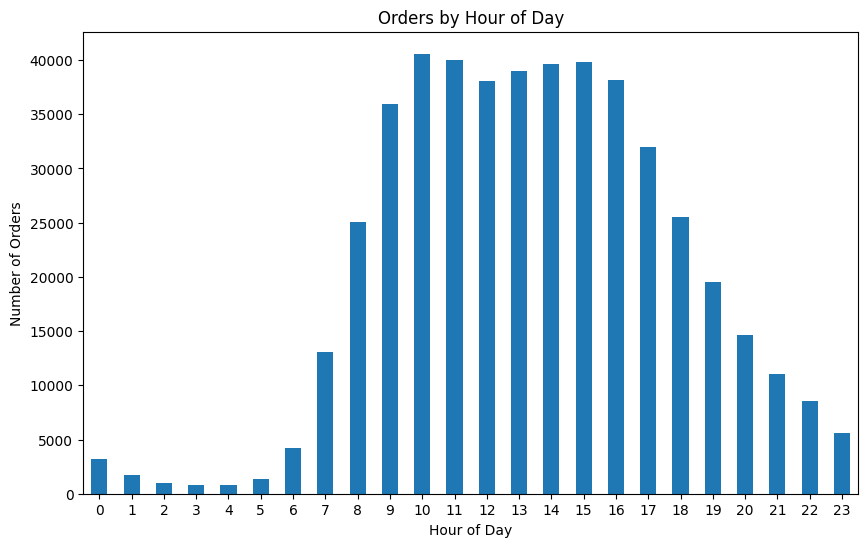

In [37]:
order_counts_by_hour = orders_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
order_counts_by_hour.plot(kind='bar')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

 Understanding customer behavior in terms of shopping time allows businesses to enhance operational efficiency and customer satisfaction. Peak activity during the early morning from 5AM and early afternoon to midnight highlights when businesses should focus their resources, while addressing off-peak trends could provide opportunities to attract more customers during quieter hours.

### [A3] What day of the week do people shop for groceries?

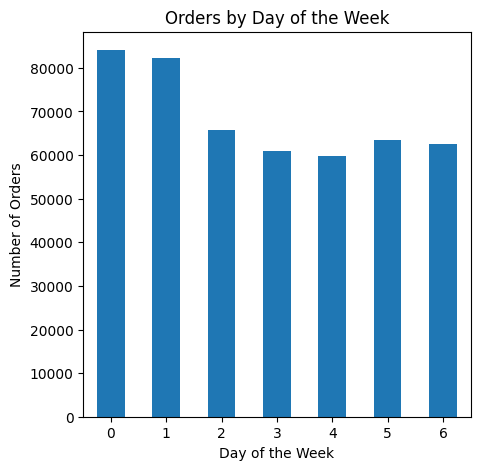

In [38]:
order_counts_by_days = orders_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(5, 5))
order_counts_by_days.plot(kind='bar')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

### [A4] How long do people wait until placing another order?

In [39]:
print('How long do people wait until placing another order?\n (number of days )\n',orders_df['days_since_prior_order'].unique())

days_counts = orders_df['days_since_prior_order'].value_counts().sort_index()


How long do people wait until placing another order?
 (number of days )
 [30.  9.  2. 10. 17. 15. 22.  4.  8.  3. 12. 11.  7.  1.  5.  6. 14.  0.
 20. 16. 24. 23. 27. 13. 28. 21. 25. 19. 18. 29. 26.]


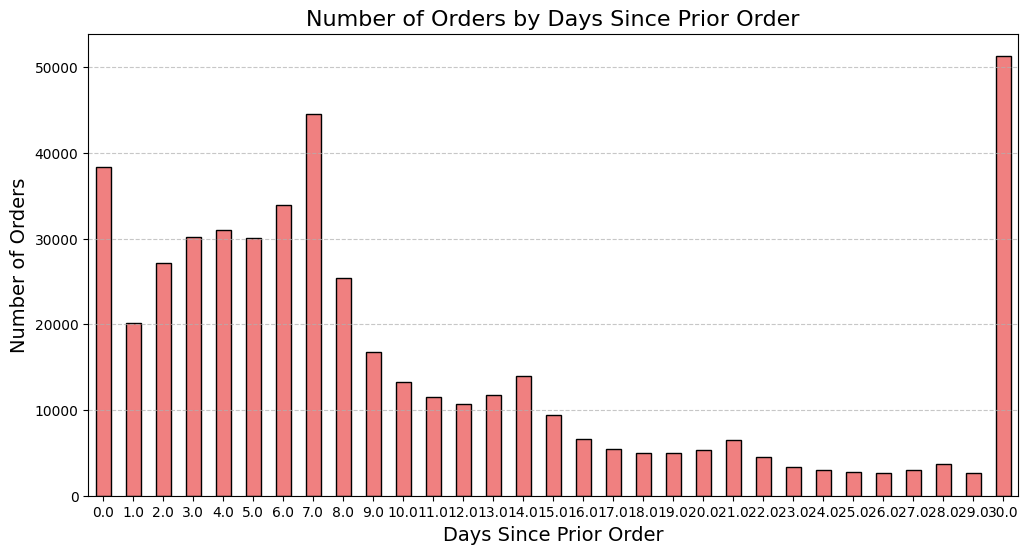

In [40]:
# Plot the results
plt.figure(figsize=(12, 6))
days_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Orders by Days Since Prior Order', fontsize=16)
plt.xlabel('Days Since Prior Order', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

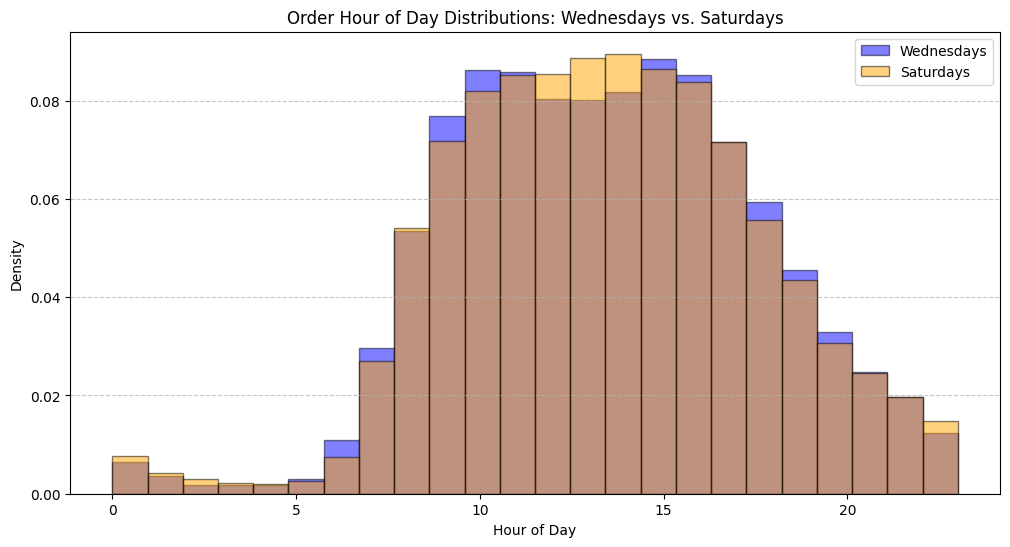

In [41]:
# Filter data for Wednesdays and Saturdays
wednesday_orders = orders_df[orders_df['order_dow'] == 3]['order_hour_of_day']
saturday_orders = orders_df[orders_df['order_dow'] == 6]['order_hour_of_day']

# Plot the histograms
plt.figure(figsize=(12, 6))
plt.hist(wednesday_orders, bins=24, alpha=0.5, label='Wednesdays', color='blue',edgecolor='black', density=True)
plt.hist(saturday_orders, bins=24, alpha=0.5, label='Saturdays', color='orange', edgecolor='black', density=True)

# Add titles and labels
plt.title('Order Hour of Day Distributions: Wednesdays vs. Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [42]:
orders_per_customer = orders_df.groupby('user_id')['order_id'].nunique()

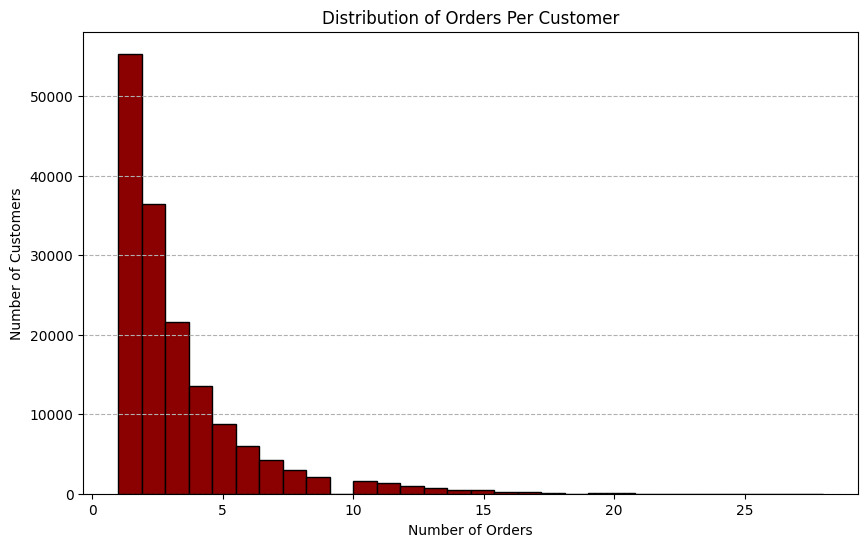

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=30, edgecolor='black', color='darkred')
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--')
plt.show()



### [B3] What are the top 20 popular products (display their id and name)?

In [44]:
merged_df = order_products_df.merge(products_df, on="product_id")

In [45]:
top_products = (
    merged_df.groupby(["product_id", "product_name"]).size().sort_values(ascending=False)
)

In [46]:

top_products.head(20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [47]:
items_per_order = order_products_df.groupby("order_id").size()


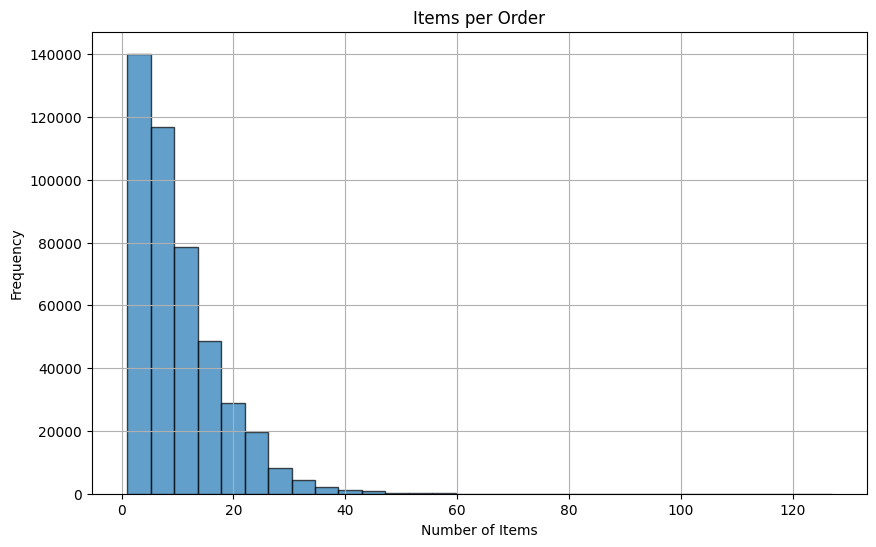

In [48]:
plt.figure(figsize=(10, 6))
items_per_order.plot(kind='hist', bins=30, title='Items per Order',edgecolor='k',alpha=0.7)
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
mean_items = items_per_order.mean()
median_items = items_per_order.median()

print('Average number of items per order:',mean_items)
print('Median number of items per order:',median_items)

Average number of items per order: 10.098983215049127
Median number of items per order: 8.0


### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
reorder_products = order_products_df[order_products_df["reordered"] == 1]
reorder_products.head(10)
reorder_counts = reorder_products.groupby('product_id').size()

In [51]:
# Sort and get top 20
top_20_reordered = reorder_counts.nlargest(20).reset_index(name='count')

In [52]:
# Merge with product names
top_20_reordered = top_20_reordered.merge(products_df, on='product_id')[['product_id', 'product_name', 'count']]

In [53]:
# Display the results
print(top_20_reordered)

    product_id              product_name  count
0        24852                    banana  55763
1        13176    bag of organic bananas  44450
2        21137      organic strawberries  28639
3        21903      organic baby spinach  26233
4        47209      organic hass avocado  23629
5        47766           organic avocado  18743
6        27845        organic whole milk  16251
7        47626               large lemon  15044
8        27966       organic raspberries  14748
9        16797              strawberries  13945
10       26209                     limes  13327
11       22935      organic yellow onion  11145
12       24964            organic garlic  10411
13       45007          organic zucchini  10076
14       49683            cucumber kirby   9538
15       28204        organic fuji apple   8989
16        8277  apple honeycrisp organic   8836
17       39275       organic blueberries   8799
18        5876             organic lemon   8412
19       49235       organic half & half

### [C3] For each product, what proportion of its orders are reorders?

In [54]:
# Check the column names
print(order_products_df.columns)

# Calculate total orders and reorders for each product
order_counts = order_products_df.groupby('product_id')['reordered'].agg(total_orders='size', reorders='sum').reset_index()

# Calculate the proportion of reorders
order_counts['reorder_proportion'] = order_counts['reorders'] / order_counts['total_orders']

# Merge with product names
order_counts = order_counts.merge(products_df, on='product_id', how='left')

# Display the product_id, product_name, and reorder_proportion
print(order_counts[['product_id', 'product_name', 'reorder_proportion']])

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               7                     pure coconut water with orange   
...           ...                                                ...   
45568       49690                      high performance energy drink   
45569       49691                      original pancake & waffle mix   
45570       49692    organic instant oatmeal light maple brown sugar   
45571       49693                             spring water body wash   
45572       49694                            burrito- steak & cheese   

       reorder_proportion  
0                0.5642

### [C4] For each customer, what proportion of their products ordered are reorders?

In [55]:
merged_df = pd.merge(order_products_df, orders_df, on='order_id')
total_products = merged_df.groupby('user_id').size()
reordered_products = merged_df[merged_df['reordered'] == 1].groupby('user_id').size()

In [56]:
proportion_reordered = (reordered_products / total_products).fillna(0)
print(proportion_reordered.head())

user_id
2    0.038462
4    0.000000
5    0.666667
6    0.000000
7    0.928571
dtype: float64


### [C5] What are the top 20 items that people put in their carts first? 

In [57]:
cart_grouped = order_products_df.groupby('product_id')['add_to_cart_order'].sum().reset_index()


In [58]:
cart_grouped_sorted = cart_grouped.sort_values(by='add_to_cart_order', ascending=False).reset_index(drop=True)
cart_grouped_sorted['in_carts_first'] = range(1, len(cart_grouped_sorted)+1)

In [59]:
cart_merged = order_products_df.merge(cart_grouped_sorted[['product_id', 'in_carts_first']], on='product_id', how='left')
print(cart_merged)

         order_id  product_id  add_to_cart_order  reordered  in_carts_first
0         2141543       11440                 17          0             518
1          567889        1560                  1          1            6712
2         2261212       26683                  1          1            2262
3          491251        8670                 35          1             240
4         2571142        1940                  5          1             286
...           ...         ...                ...        ...             ...
4545002    577211       15290                 12          1              68
4545003   1219554       21914                  9          0            1668
4545004    692640       47766                  4          1               8
4545005    319435         691                  8          1            1604
4545006   1398151       28733                  9          0            2026

[4545007 rows x 5 columns]


This analysis provides a comprehensive understanding of customer behavior and actionable recommendations for Instacart to improve operational efficiency, enhance marketing strategies, and boost customer satisfaction. Future work could include analyzing customer segmentation to further refine these strategies